<a href="https://colab.research.google.com/github/JesunAhmadUshno/Predictive-Analytics-Studies/blob/main/ARIMA_TimeSeries_Analysis_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Sample time series data (replace with your own)
data = {
    'date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'value': [i + (i**0.5)*0.5 for i in range(100)]  # Slightly trending data
}
df = pd.DataFrame(data)
df.set_index('date', inplace=True)

# Run ADF Test
result = adfuller(df['value'])

# Print results
print('--- Augmented Dickey-Fuller Test Results ---')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpret the result
if result[1] <= 0.05:
    print("\n✅ The time series is stationary (reject the null hypothesis).")
else:
    print("\n❌ The time series is non-stationary (fail to reject the null hypothesis).")


--- Augmented Dickey-Fuller Test Results ---
ADF Statistic: -14.695937025734569
p-value: 2.998403357276392e-27
Critical Values:
   1%: -3.5019123847798657
   5%: -2.892815255482889
   10%: -2.583453861475781

✅ The time series is stationary (reject the null hypothesis).


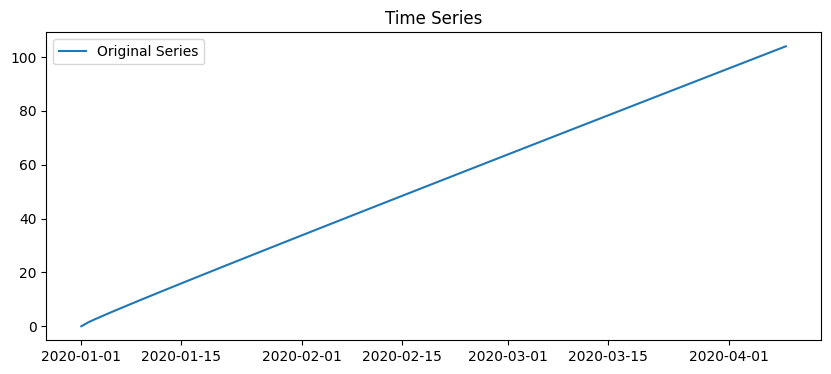

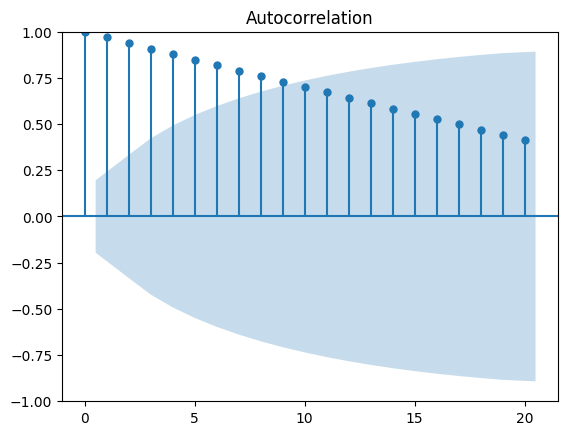

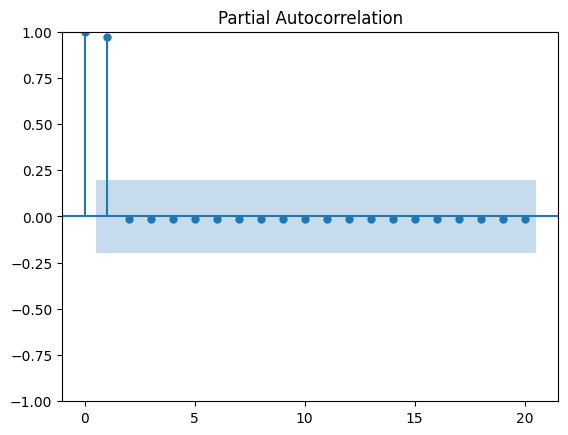

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 212.803
Date:                Thu, 12 Jun 2025   AIC                           -419.606
Time:                        17:58:42   BIC                           -411.821
Sample:                    01-01-2020   HQIC                          -416.456
                         - 04-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9986      0.002    520.166      0.000       0.995       1.002
ma.L1          0.9148      0.126      7.246      0.000       0.667       1.162
sigma2         0.0007   9.07e-05      7.976      0.0

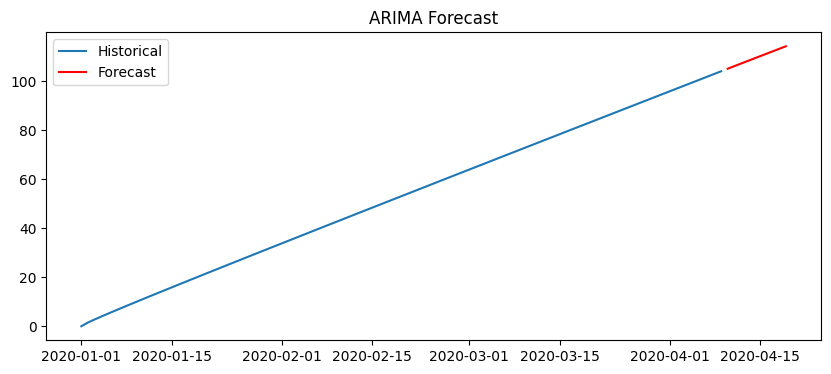

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load or simulate time series data
data = {
    'date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'value': [i + (i**0.5)*0.5 for i in range(100)]  # Example data
}
df = pd.DataFrame(data)
df.set_index('date', inplace=True)

# Plot original series
plt.figure(figsize=(10, 4))
plt.plot(df['value'], label='Original Series')
plt.title('Time Series')
plt.legend()
plt.show()

# (Optional) ACF and PACF plots to help determine p and q
plot_acf(df['value'], lags=20)
plot_pacf(df['value'], lags=20)
plt.show()

# Fit ARIMA model (change p, d, q as needed)
model = ARIMA(df['value'], order=(1, 1, 1))  # (p=1, d=1, q=1)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Plot forecast
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['value'], label='Historical')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


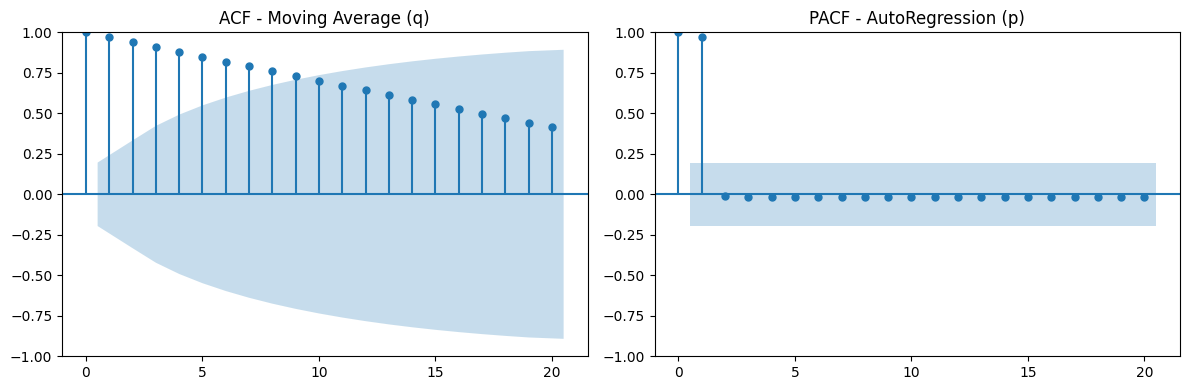

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Your time series, assuming 'df' is already defined with 'value' column
series = df['value']

# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ACF plot (for q)
plot_acf(series, lags=20, ax=axes[0])
axes[0].set_title('ACF - Moving Average (q)')

# PACF plot (for p)
plot_pacf(series, lags=20, ax=axes[1], method='ywm')
axes[1].set_title('PACF - AutoRegression (p)')

plt.tight_layout()
plt.show()


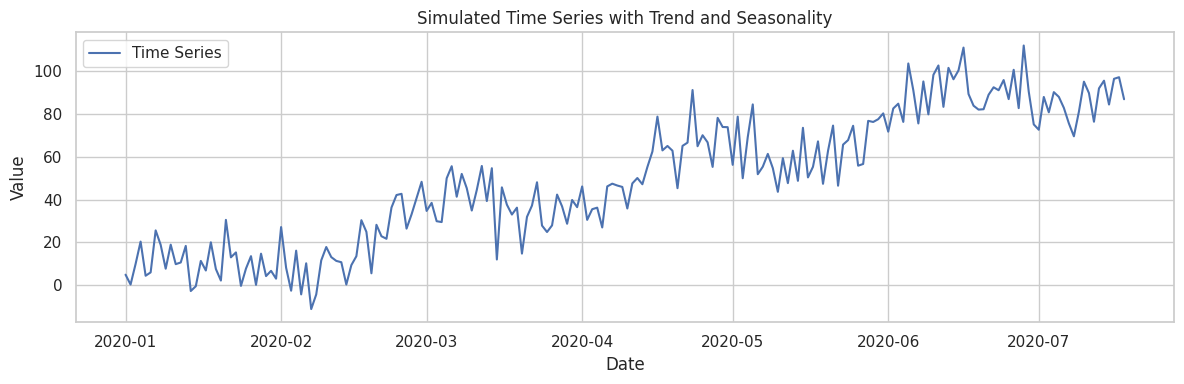


--- Augmented Dickey-Fuller Test ---
ADF Statistic: -0.7281241000761342
p-value: 0.8393296644879462
Critical Value 1%: -3.4645146202692527
Critical Value 5%: -2.8765564361715534
Critical Value 10%: -2.5747745328940375
Result: ❌ Non-stationary (p > 0.05)


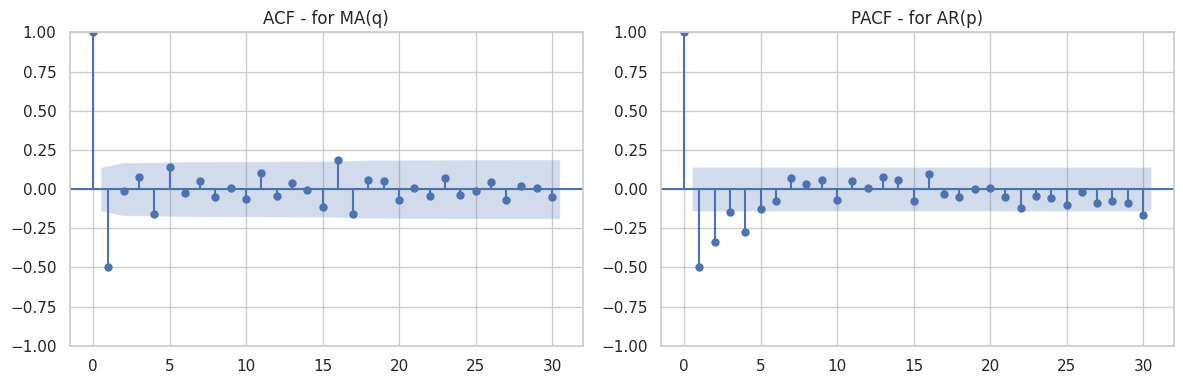


--- Fitting ARIMA(2,1,2) Model ---
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  199
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -748.805
Date:                Thu, 12 Jun 2025   AIC                           1507.611
Time:                        18:01:29   BIC                           1524.052
Sample:                    01-02-2020   HQIC                          1514.265
                         - 07-18-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9537      0.173     -5.513      0.000      -1.293      -0.615
ar.L2         -0.1731      0.100     -1.739      0.082      -0.368       0.022
ma.L1          0

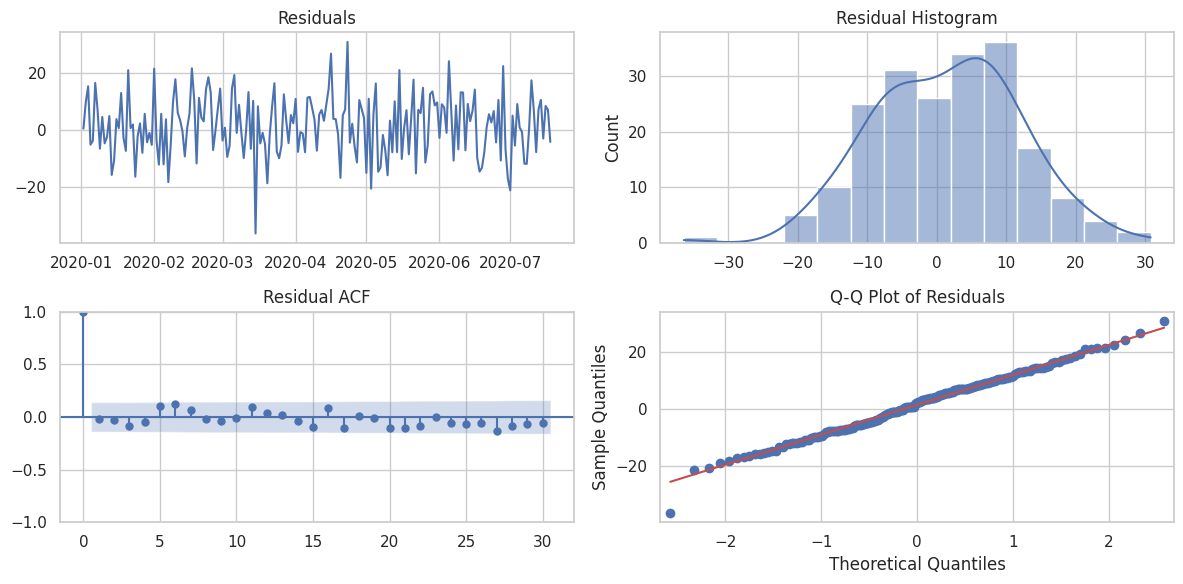


--- Ljung-Box Test for Residuals ---
     lb_stat  lb_pvalue
10  8.701706   0.560627
✅ Residuals look like white noise (no autocorrelation)


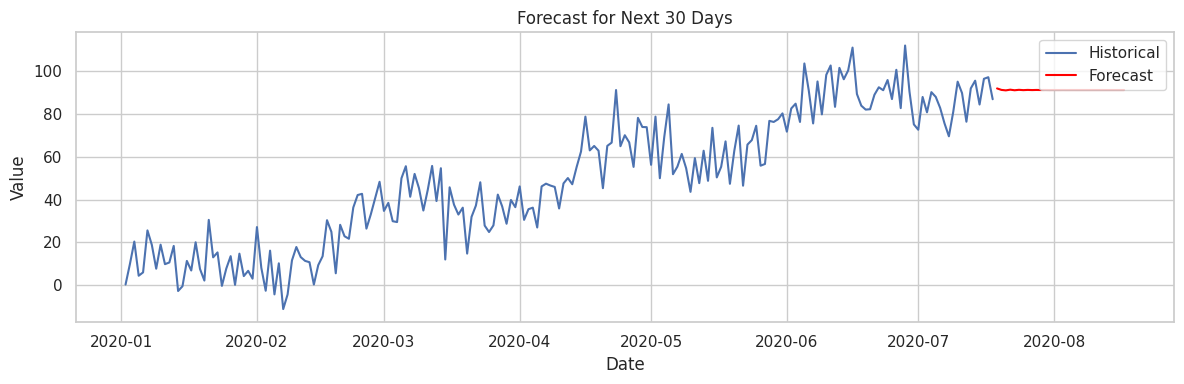

In [4]:
# -----------------------------------------------
# 1. Import Required Libraries
# -----------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# -----------------------------------------------
# 2. Simulate a Time Series Dataset (or use your own)
# -----------------------------------------------
np.random.seed(42)

# Generate a trend + noise time series
n = 200
time = np.arange(n)
trend = 0.5 * time
seasonality = 10 * np.sin(2 * np.pi * time / 50)
noise = np.random.normal(scale=10, size=n)
values = trend + seasonality + noise

df = pd.DataFrame({'date': pd.date_range(start='2020-01-01', periods=n, freq='D'),
                   'value': values})
df.set_index('date', inplace=True)

# -----------------------------------------------
# 3. Visualize the Time Series
# -----------------------------------------------
plt.figure(figsize=(12, 4))
plt.plot(df['value'], label='Time Series')
plt.title('Simulated Time Series with Trend and Seasonality')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 4. Augmented Dickey-Fuller Test (ADF)
# -----------------------------------------------
print("\n--- Augmented Dickey-Fuller Test ---")
adf_result = adfuller(df['value'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
for key, val in adf_result[4].items():
    print(f"Critical Value {key}: {val}")

if adf_result[1] > 0.05:
    print("Result: ❌ Non-stationary (p > 0.05)")
    df['value_diff'] = df['value'].diff().dropna()
else:
    print("Result: ✅ Stationary (p <= 0.05)")
    df['value_diff'] = df['value']

# Drop NA from differencing
df.dropna(inplace=True)

# -----------------------------------------------
# 5. ACF & PACF Plots to Estimate p and q
# -----------------------------------------------
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_acf(df['value_diff'], lags=30, ax=plt.gca(), title='ACF - for MA(q)')
plt.subplot(1, 2, 2)
plot_pacf(df['value_diff'], lags=30, ax=plt.gca(), title='PACF - for AR(p)')
plt.tight_layout()
plt.show()

# Based on the plots, let's assume p=2, d=1, q=2

# -----------------------------------------------
# 6. Fit ARIMA Model
# -----------------------------------------------
print("\n--- Fitting ARIMA(2,1,2) Model ---")
model = ARIMA(df['value'], order=(2, 1, 2))
model_fit = model.fit()

# Model summary
print(model_fit.summary())

# -----------------------------------------------
# 7. Residual Diagnostics
# -----------------------------------------------
residuals = model_fit.resid

plt.figure(figsize=(12, 6))

# Residual plot
plt.subplot(2, 2, 1)
plt.plot(residuals)
plt.title('Residuals')

# Histogram
plt.subplot(2, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Residual Histogram')

# ACF of residuals
plt.subplot(2, 2, 3)
plot_acf(residuals, lags=30, ax=plt.gca(), title='Residual ACF')

# QQ Plot
from statsmodels.graphics.gofplots import qqplot
plt.subplot(2, 2, 4)
qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Ljung-Box test (for autocorrelation in residuals)
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\n--- Ljung-Box Test for Residuals ---")
print(ljung_box)
if ljung_box['lb_pvalue'].values[0] > 0.05:
    print("✅ Residuals look like white noise (no autocorrelation)")
else:
    print("❌ Residuals are autocorrelated")

# -----------------------------------------------
# 8. Forecasting
# -----------------------------------------------
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Plot forecast
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['value'], label='Historical')
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
plt.plot(future_dates, forecast, color='red', label='Forecast')
plt.title('Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()
